# 예측모델 만들기

## Preprocessing

### improt library

In [3]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm import tqdm_notebook as tqdm
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 데이터 가져오기

In [4]:
data = pd.read_csv('gdrive/My Drive/공모전/Lpoint/데이터셋 만들기/lotte_drama.csv')
data.rename(columns = {'CLAC1_NM':'분류','CLAC2_NM':'중분류'},inplace = True)
data = pd.get_dummies(data,columns = ['분류','중분류'])
target = pd.read_csv('gdrive/My Drive/공모전/Lpoint/선호지수 만들기/score1.csv')
target2 = pd.read_csv('gdrive/My Drive/공모전/Lpoint/선호지수 만들기/score2.csv')
trainset = pd.merge(data,target, how = 'inner', on=['LABEL']).set_index('LABEL')
trainset2 = pd.merge(data,target2, how = 'inner', on=['LABEL']).set_index('LABEL')
trainset.head()

,PD_BUY_AM,PD_BUY_CT,PD_SALES,BRA_SC,CLAC3_SC,F_10,F_20,F_30,F_40,F_50,...,중분류_여성의류하의,중분류_여성지갑,중분류_여성화,중분류_여행용가방류,중분류_우산/양산류,중분류_유아동화,중분류_캐쥬얼가방,중분류_패션액세서리,중분류_향수,SCORE
LABEL,,,,,,,,,,,,,,,,,,,,,
갤럭시_남성가디건,239200,1,239200,-0.291577,-0.090297,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.055195
게스_남성가디건,63146,144,9093024,0.551194,-0.090297,0.0,3.0,22.0,72.0,22.0,...,0,0,0,0,0,0,0,0,0,0.291875
꼼데가르송_남성가디건,466000,2,932000,-0.291577,-0.090297,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.329767
내셔널지오그래픽_남성가디건,84257,7,589799,-0.291577,-0.090297,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.396146
라코스테_남성가디건,248476,68,16896368,6.421080,-0.090297,0.0,10.0,17.0,13.0,6.0,...,0,0,0,0,0,0,0,0,0,0.408730


In [5]:
data2 = pd.read_csv('gdrive/My Drive/공모전/Lpoint/데이터셋 만들기/mlotte_drama.csv')
data2.rename(columns = {'CLAC1_NM':'분류','CLAC2_NM':'중분류'},inplace = True)
data2 = pd.get_dummies(data2,columns = ['분류','중분류'])
target21 = pd.read_csv('gdrive/My Drive/공모전/Lpoint/선호지수 만들기/score12.csv')
target22 = pd.read_csv('gdrive/My Drive/공모전/Lpoint/선호지수 만들기/score22.csv')
testset = pd.merge(data2,target21, how = 'inner', on=['LABEL']).set_index('LABEL')
testset2 = pd.merge(data2,target22, how = 'inner', on=['LABEL']).set_index('LABEL')
testset.head()

,PD_BUY_AM,PD_BUY_CT,PD_SALES,BRA_SC,CLAC3_SC,F_10,F_20,F_30,F_40,F_50,...,중분류_여성의류하의,중분류_여성지갑,중분류_여성화,중분류_여행용가방류,중분류_우산/양산류,중분류_유아동화,중분류_캐쥬얼가방,중분류_패션액세서리,중분류_향수,SCORE
LABEL,,,,,,,,,,,,,,,,,,,,,
2018-04_갤럭시_남성가디건,239200,1,239200,-0.228274,-0.113708,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.052245
2018-04_게스_남성가디건,72507,43,3117801,0.400555,-0.113708,0.0,1.0,5.0,23.0,3.0,...,0,0,0,0,0,0,0,0,0,0.130391
2018-04_내셔널지오그래픽_남성가디건,77400,1,77400,-0.228274,-0.113708,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.095987
2018-04_라코스테_남성가디건,231750,16,3708000,11.259699,-0.113708,0.0,3.0,4.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0.276917
2018-04_본_남성가디건,50000,1,50000,1.774020,-0.113708,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.139702


In [6]:
X, y = trainset.iloc[:,:-1], trainset['SCORE']
X.shape, y.shape

((4157, 73), (4157,))

In [7]:
X2, y2 = testset.iloc[:,:-1], testset['SCORE']*100
X2.shape, y2.shape

((16571, 73), (16571,))

In [8]:
y2['2018-04_라프레리_선크림류']

0.0

In [0]:
bins = [y2.quantile(i*0.25) for i in range(5)]
labels = [1,2,3,4]
y2=pd.cut(y2, bins = bins, labels = labels)

In [0]:
y2[y2.isnull()] = 1

## Models

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X2, y2, test_size = .3, random_state=123456)

### Classicifier

#### Lgistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

rf = LogisticRegression(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [0]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [0]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_val, y_val)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, tes, test_labels)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
# Create a based model
lr = LogisticRegression()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [0]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_val, y_val)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.2min


In [0]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(X_val)
accuracy = accuracy_score(y_val, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.5
Mean accuracy score: 0.507


In [0]:
from tabulate import tabulate
headers = ["name", "score"]
values = sorted(zip(X_train.columns, rf.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

name                         score
CLAC3_SC               0.115792
BRA_SC                 0.092937
PD_BUY_AM              0.0772668
PD_SALES               0.0744845
Mobile                 0.0374052
PD_BUY_CT              0.0365722
Seoul                  0.0363439
F_40                   0.0322541
F_30                   0.0319813
Gyeonggi               0.0274317
Busan                  0.024839
NOT_SIGNED             0.0238293
Desktop                0.0235974
F_20                   0.0210083
F_50                   0.0179504
M_40                   0.0166481
Daegu                  0.0160407
Gyeongnam              0.0154341
중분류_보석            0.0147761
M_30                   0.0141758
Incheon                0.0141323
Gyeongbu               0.0134415
Jeonbuk                0.0128328
Gwangju                0.0124914
Chungnam               0.0117056
Chungbuk               0.011694
Daejeon                0.0115436
중분류_메이크업        0.0102033
Jeonnam                0.00984461
Ulsan                  

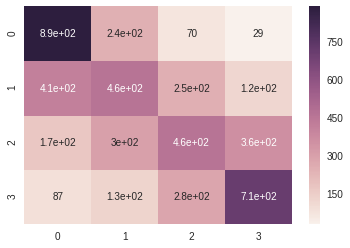

In [0]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_val, predicted))
sns.heatmap(cm, annot=True)

### Regression

#### Ridge

In [0]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X_train, y_train)
pred = ridge_reg.predict(X_val)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.137424e-19
  overwrite_a=True).T


In [0]:
from sklearn.metrics import mean_squared_error
print('score = ',ridge_reg.score(X_val,y_val))
print('MSE = ',mean_squared_error(pred,y_val))
print('RMSE = ',mean_squared_error(pred,y_val)**0.5)

score =  0.11667436955006782
MSE =  0.010277087592080637
RMSE =  0.10137597147293158


### Decision Tree

#### Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(n_estimators = 100)
rnd_reg.fit(X_train,y_train)
pred = rnd_reg.predict(X_val)

In [0]:
from sklearn.metrics import mean_squared_error
print('score = ',rnd_reg.score(X_val,y_val))
print('MSE = ',mean_squared_error(pred,y_val))
print('RMSE = ',mean_squared_error(pred,y_val)**0.5)

score =  0.5435047704069159
MSE =  53.879792543286264
RMSE =  7.3402855900357356


#### GradientBoost

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np


gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train,y_train)

errors = [mean_squared_error(y_val,y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=119, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import mean_squared_error
pred = gbrt_best.predict(X_val)

print('MSE = ',mean_squared_error(pred,y_val))
print('RMSE = ',mean_squared_error(pred,y_val)**0.5)

MSE =  63.41059979314893
RMSE =  7.963077281626051


In [0]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float('inf')
error_going_up = 0

for n_estimators in range(1,1200):
  gbrt.n_estimators = n_estimators
  gbrt.fit(X_train,y_train)
  y_pred = gbrt.predict(X_val)
  val_error = mean_squared_error(y_val,y_pred)
  if val_error < min_val_error:
    min_val_error = val_error
    error_going_up = 0
  else:
    error_going_up += 1
    if error_going_up == 5:
      print(n_estimators,min_val_error)
      break

350 0.005559259321628956


In [0]:
0.005559259321628956**0.5

0.07456044072850533